In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set_theme()

# Part 1

Q1

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

all_data = pd.concat([train_data, test_data])

for i in all_data.columns:
    if all_data[i].dtype == 'object':
        all_data[i].fillna('None', inplace=True)
    else:
        all_data[i].fillna(all_data[i].median(), inplace=True)     

# one-hot encoding
all_data_dummies = pd.get_dummies(all_data, drop_first=True)

train_data_dummies = all_data_dummies.iloc[:1000]
test_data_dummies = all_data_dummies.iloc[1000:]

# feature scaling
# store the not featured columns
train_data_salePrice_var = train_data_dummies['SalePrice']
train_data_label_var = train_data_dummies['label']
x_train = train_data_dummies.drop(['SalePrice', 'label'], axis=1)
y_train = train_data_salePrice_var

test_data_salePrice_var = test_data_dummies['SalePrice']
test_data_label_var = test_data_dummies['label']
x_test = test_data_dummies.drop(['SalePrice', 'label'], axis=1)
y_test = test_data_salePrice_var

scaler = StandardScaler().fit(x_train)
train_data_scaled = scaler.transform(x_train)
test_data_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(train_data_scaled, index=x_train.index, columns=x_train.columns)

x_test = pd.DataFrame(test_data_scaled, index=x_test.index, columns=x_test.columns)

For question 1, it requires to remove the duplications, fill in the missing value and standardize it for data preprocessing. So I use the drop_duplicates(), then using a for loop to fill in the corresponding missing values, and  standardize the train and test data by StandardScaler(). Last, divide it back to training and testing set.

Q2 

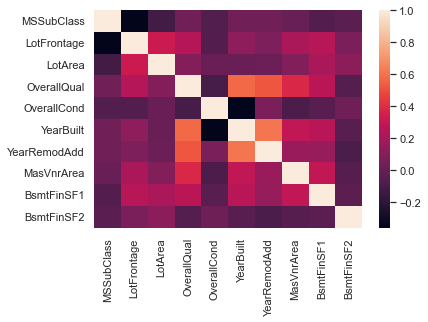

In [3]:
# heatmap
ax = sns.heatmap(x_train[x_train.columns[:10]].corr())

For question 2, I used the sns.heatmap() to produce the heatmap, with [:10] to select the first 10 features and corr() for calculating the correlation.

# Part 2

Q3

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score

# For linear regression
model = LinearRegression(fit_intercept=True)
selector_lr = SelectFromModel(estimator = model).fit(x_train, np.log(y_train))

lr_model_new = model.fit(x_train[x_train.columns[selector_lr.get_support()]], y_train)
y_pred_lr = lr_model_new.predict(x_test[x_train.columns[selector_lr.get_support()]])

r_squared_lr = r2_score(y_test, y_pred_lr)
print('The r^2 for Linear Regression: ', r_squared_lr)

# For lasso
model = Lasso(alpha = 0.005, random_state = 4211)
selector_lasso = SelectFromModel(estimator = model).fit(x_train, np.log(y_train))

lasso_model_new = model.fit(x_train[x_train.columns[selector_lasso.get_support()]], y_train)
y_pred_lasso = lasso_model_new.predict(x_test[x_train.columns[selector_lasso.get_support()]])

r_squared_lasso = r2_score(y_test, y_pred_lasso)
print('The r^2 for LASSO: ', r_squared_lasso)





The r^2 for Linear Regression:  0.6922279117228786
The r^2 for LASSO:  0.8857325048113579


/Users/adrian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.990e+10, tolerance: 6.296e+08
  model = cd_fast.enet_coordinate_descent(


So the r^2 for LASSO is larger than Linear Regression by around 0.2. It may due to the SelectFromModel() reduced the features of Linear Regression, while Linear Regression should requires more estimators to produce a more precise prediction. Instead, LASSO is penalized for the sum of absolute values of the weights, which means the original weights may be over-reacted.

# Part 3

Q4

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

part3_x_data = x_train
part3_y_data = y_train

part3_x_train, part3_x_test, part3_y_train, part3_y_test = train_test_split(part3_x_data, part3_y_data, test_size=0.20, random_state=4211)

model = LinearRegression(fit_intercept=True)

# model for LotArea
lr_model_LotArea = model.fit(part3_x_train['LotArea'].to_frame(), part3_y_train)
y_pred_LotArea = lr_model_LotArea.predict(part3_x_test['LotArea'].to_frame())
r_squared_LotArea = r2_score(part3_y_test, y_pred_LotArea)
coef_LotArea = lr_model_LotArea.coef_
print('The r^2 for LotArea: ', r_squared_LotArea)

# model for GrLivArea
lr_model_GrLivArea = model.fit(part3_x_train['GrLivArea'].to_frame(), part3_y_train)
y_pred_GrLivArea = lr_model_GrLivArea.predict(part3_x_test['GrLivArea'].to_frame())
r_squared_GrLivArea = r2_score(part3_y_test, y_pred_GrLivArea)
coef_GrLivArea = lr_model_GrLivArea.coef_
print('The r^2 for GrLivArea: ', r_squared_GrLivArea)

# model for OverallQual
lr_model_OverallQual = model.fit(part3_x_train['OverallQual'].to_frame(), part3_y_train)
y_pred_OverallQual = lr_model_OverallQual.predict(part3_x_test['OverallQual'].to_frame())
r_squared_OverallQual = r2_score(part3_y_test, y_pred_OverallQual)
coef_OverallQual = lr_model_OverallQual.coef_
print('The r^2 for OverallQual: ', r_squared_OverallQual)

# model for OverallCond
lr_model_OverallCond = model.fit(part3_x_train['OverallCond'].to_frame(), part3_y_train)
y_pred_OverallCond = lr_model_OverallCond.predict(part3_x_test['OverallCond'].to_frame())
r_squared_OverallCond = r2_score(part3_y_test, y_pred_OverallCond)
coef_OverallCond = lr_model_OverallCond.coef_
print('The r^2 for OverallCond: ', r_squared_OverallCond)

# model for all features selected in Part 2
start = time.time()
lr_model_all = model.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]], part3_y_train)
end = time.time()
training_time_lr = end - start
y_pred_all = lr_model_all.predict(part3_x_test[part3_x_train.columns[selector_lasso.get_support()]])
r_squared_all = r2_score(part3_y_test, y_pred_all)
print('The r^2 for all selected features: ', r_squared_all)


The r^2 for LotArea:  0.02053447599941216
The r^2 for GrLivArea:  0.3926843861046173
The r^2 for OverallQual:  0.5869504375679953
The r^2 for OverallCond:  0.017107462820201147
The r^2 for all selected features:  0.6872210477495635


As we can see, the r^2 for selected features perform the best r^2 among the 5 models, around 69% of the data can be explained. The second best is OverallQual, perfomr normally with around r^2 = 0.59. While for the remainings, they have extremely low r^2 which make the prdiction Inaccurate. Probably due to only one estimator so the independent variable can not explaining much in the variation of the dependent variable. Maybe they can be some good estimators when using with other features, while not appropriate for building model separately. For example LotArea, large LotArea do not mean the salePrice must be high, there are other factors that may affect it too, such as GrLivArea.

Q5


The Graphs:


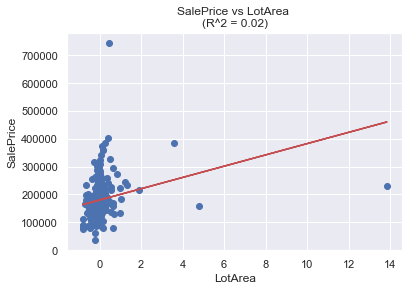

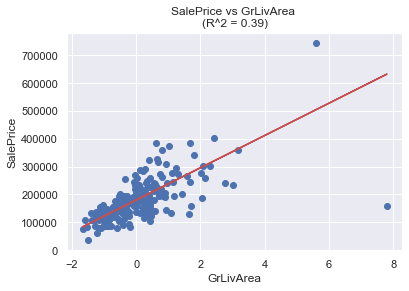

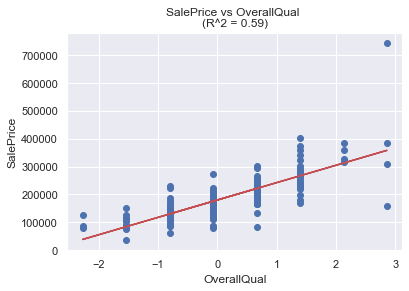

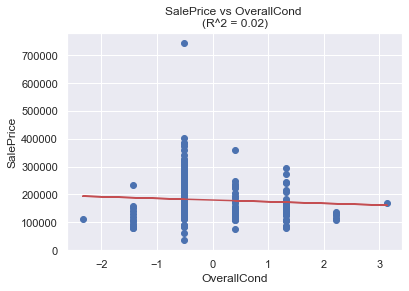

In [6]:
print('\nThe Graphs:')

# graph for LotArea
plt.scatter(part3_x_test['LotArea'], part3_y_test)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("SalePrice vs LotArea \n(R^2 = " + str(round(r_squared_LotArea, 2)) + ")")
plt.plot(part3_x_test['LotArea'], lr_model_LotArea.intercept_ + coef_LotArea*part3_x_test['LotArea'],'r')
plt.show()

# graph for GrLivArea
plt.scatter(part3_x_test['GrLivArea'], part3_y_test)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("SalePrice vs GrLivArea \n(R^2 = " + str(round(r_squared_GrLivArea, 2)) + ")")
plt.plot(part3_x_test['GrLivArea'], lr_model_GrLivArea.intercept_ + coef_GrLivArea*part3_x_test['GrLivArea'],'r')
plt.show()

# graph for OverallQual
plt.scatter(part3_x_test['OverallQual'], part3_y_test)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("SalePrice vs OverallQual \n(R^2 = " + str(round(r_squared_OverallQual, 2)) + ")")
plt.plot(part3_x_test['OverallQual'], lr_model_OverallQual.intercept_ + coef_OverallQual*part3_x_test['OverallQual'],'r')
plt.show()

# graph for OverallCond
plt.scatter(part3_x_test['OverallCond'], part3_y_test)
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.title("SalePrice vs OverallCond \n(R^2 = " + str(round(r_squared_OverallCond, 2)) + ")")
plt.plot(part3_x_test['OverallCond'], lr_model_OverallCond.intercept_ + coef_OverallCond*part3_x_test['OverallCond'],'r')
plt.show()


From the graphs, LotArea, GrLivArea and OverallQual are positively related to SalePrice, OverallCond is tends to negatively related to SalePrice though not obvious relationship. Althoght the outliners prolong the axises, the data for LotArea is still discrete from the regression line. For GrLivArea, it is more near to the regression line, especially for those <1. For OverallQual, it has a quite clear trend with certain level of fluctuations. For OverallCond, most of the data locate between -0.5 and 1.5, with large fluctuations and unclear trend.

Q6

The average training time for H =
1: 0.034952640533447266
2: 0.035035292307535805
4: 0.03661266962687174
8: 0.03877401351928711
16: 0.0473785400390625
32: 1.06966765721639
64: 1.2678646246592205
128: 0.6720929145812988


The standard deviation of training time for H =
1: 0.006763380320868408
2: 0.002765018006681518
4: 0.0036232726273031143
8: 0.00234616406957328
16: 0.004650403498977217
32: 0.6030288195945444
64: 0.10791999773435412
128: 0.2171817343916918


The average r^2 for H =
1: -5.47574090011687
2: -5.475792341404797
4: -5.475774066506075
8: -5.475723272248378
16: -5.475713365716507
32: 0.6766235488919575
64: 0.6840989349637548
128: 0.7290267356622285

 


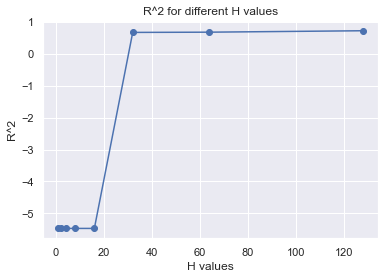

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import f1_score, accuracy_score
from matplotlib import pyplot as plt
import time
import statistics

part3_x_data = x_train
part3_y_data = y_train # salePrice

# part3_x_train, part3_x_test, part3_y_train, part3_y_test = train_test_split(part3_x_data, part3_y_data, test_size=0.20, random_state=4211)

training_time_1 = []
training_time_2 = []
training_time_4 = []
training_time_8 = []
training_time_16 = []
training_time_32 = []
training_time_64 = []
training_time_128 = []

r_squared_1 = []
r_squared_2 = []
r_squared_4 = []
r_squared_8 = []
r_squared_16 = []
r_squared_32 = []
r_squared_64 = []
r_squared_128 = []

def question6(a):
    
    global training_time_1
    global training_time_2
    global training_time_4
    global training_time_8 
    global training_time_16 
    global training_time_32 
    global training_time_64 
    global training_time_128 

    global r_squared_1 
    global r_squared_2 
    global r_squared_4 
    global r_squared_8 
    global r_squared_16 
    global r_squared_32 
    global r_squared_64 
    global r_squared_128 
    
    part3_x_train, part3_x_test, part3_y_train, part3_y_test = train_test_split(part3_x_data, part3_y_data, test_size=0.20, random_state=a)

    # for H = 1
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (1,1,1,1,1,1), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_1.append(stop - start)
    y_pred_1 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_1.append(r2_score(part3_y_test, y_pred_1))

    # for H = 2
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (2,2,2,2,2,2), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_2.append(stop - start)
    y_pred_2 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_2.append(r2_score(part3_y_test, y_pred_2))

    # for H = 4
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (4,4,4,4,4,4), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_4.append(stop - start)
    y_pred_4 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_4.append(r2_score(part3_y_test, y_pred_4))

    # for H = 8
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (8,8,8,8,8,8), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_8.append(stop - start)
    y_pred_8 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_8.append(r2_score(part3_y_test, y_pred_8))

    # for H = 16
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (16,16,16,16,16,16), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_16.append(stop - start)
    y_pred_16 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_16.append(r2_score(part3_y_test, y_pred_16))

    # for H = 32
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (32,32,32,32,32,32), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_32.append(stop - start)
    y_pred_32 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_32.append(r2_score(part3_y_test, y_pred_32))

    # for H = 64
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (64,64,64,64,64,64), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_64.append(stop - start)
    y_pred_64 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_64.append(r2_score(part3_y_test, y_pred_64))

    # for H = 128
    start = time.time()
    mlp = MLPRegressor(hidden_layer_sizes = (128,128,128,128,128,128), max_iter=500, early_stopping=True)
    mlp.fit(part3_x_train[part3_x_train.columns[selector_lasso.get_support()]].values, part3_y_train)
    stop = time.time()
    training_time_128.append(stop - start)
    y_pred_128 = mlp.predict(part3_x_test[part3_x_test.columns[selector_lasso.get_support()]].values)
    r_squared_128.append(r2_score(part3_y_test, y_pred_128))
    
question6(4211)
question6(2022)
question6(6789)

# the average training time for different H
print("The average training time for H =")
print("1: " + str(statistics.mean(training_time_1)))
print("2: " + str(statistics.mean(training_time_2)))
print("4: " + str(statistics.mean(training_time_4)))
print("8: " + str(statistics.mean(training_time_8)))
print("16: " + str(statistics.mean(training_time_16)))
print("32: " + str(statistics.mean(training_time_32)))
print("64: " + str(statistics.mean(training_time_64)))
print("128: " + str(statistics.mean(training_time_128)))
print("\n")

# the standard deviation for different H
print("The standard deviation of training time for H =")
print("1: " + str(statistics.stdev(training_time_1)))
print("2: " + str(statistics.stdev(training_time_2)))
print("4: " + str(statistics.stdev(training_time_4)))
print("8: " + str(statistics.stdev(training_time_8)))
print("16: " + str(statistics.stdev(training_time_16)))
print("32: " + str(statistics.stdev(training_time_32)))
print("64: " + str(statistics.stdev(training_time_64)))
print("128: " + str(statistics.stdev(training_time_128)))
print("\n")

# the average r^2 for different H
print("The average r^2 for H =")
print("1: " + str(statistics.mean(r_squared_1)))
print("2: " + str(statistics.mean(r_squared_2)))
print("4: " + str(statistics.mean(r_squared_4)))
print("8: " + str(statistics.mean(r_squared_8)))
print("16: " + str(statistics.mean(r_squared_16)))
print("32: " + str(statistics.mean(r_squared_32)))
print("64: " + str(statistics.mean(r_squared_64)))
print("128: " + str(statistics.mean(r_squared_128)))
print("\n ")

# the graph
x = (1,2,4,8,16,32,64,128) 
y = (statistics.mean(r_squared_1),statistics.mean(r_squared_2),statistics.mean(r_squared_4),statistics.mean(r_squared_8),statistics.mean(r_squared_16),statistics.mean(r_squared_32),statistics.mean(r_squared_64),statistics.mean(r_squared_128))
plt.title("R^2 for different H values") 
plt.xlabel("H values") 
plt.ylabel("R^2") 
plt.plot(x,y, marker="o") 
plt.show()


For this part, I created a funciton that takes 1 parameter for the random seed, then run the function 3 times with seeds 4211, 2022 & 6789. Then store the training time, and r^2 for differnt values of H in the empty sets decleared at the beginning. So I can generate the mean and standard deviation from the 3 trials. The model setting are the same with different H, 6 hidden layers (e.g. 1,1,1,1,1,1), max_iter is 500 and allow the early stopping. By training the model with 3 different training sets, we can observe that more units require more training time in general. While the r^2 will be improved at the same time. 

Q7

In [8]:
# Comparison
print("Comparison of the linear regression model and the best neural network model(H=128): \n")
print("The Training time for the linear regression (selected features): ", training_time_lr)
print("The Training time for the best neural network model: ", statistics.mean(training_time_128))
print("\n")
print("The r^2 for the linear regression (selected features): ", r_squared_all)
print("The average r^2 for the best neural network model: ", statistics.mean(r_squared_128))
print("\n")


Comparison of the linear regression model and the best neural network model(H=128): 

The Training time for the linear regression (selected features):  0.007483243942260742
The Training time for the best neural network model:  0.6720929145812988


The r^2 for the linear regression (selected features):  0.6872210477495635
The average r^2 for the best neural network model:  0.7290267356622285




So both the training time and r^2 of Linear Regression performs better than LASSO, which a lot faster training and higher r^2

Q8

It seems that more hidden units, more training time are required. Also the r^2 become positive and quite good since H=32, keeping increasing for more hidden units. A small H may suffer from outliers thus result in abnormal r^2 (negative). While for more hidden units, more training and weight so the time and accuacy increases.

## Part 4

Q9

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
import time
import statistics

part4_x_data = x_train
part4_x_data = part4_x_data[part4_x_data.columns[selector_lasso.get_support()]]
part4_y_data = train_data_label_var # label

part4_training_time = []
part4_accuracy = []
part4_f1_score = []

def question9(a):
    global part4_training_time
    global part4_accuracy
    global part4_f1_score

    part4_x_train, part4_x_test, part4_y_train, part4_y_test = train_test_split(part4_x_data, part4_y_data, test_size = 0.20, random_state = a)

    # settinng: eat0=0.5 
    start = time.time()
    logreg = SGDClassifier(loss="log", learning_rate='invscaling', eta0=0.5)
    logreg.fit(part4_x_train, part4_y_train)
    stop = time.time()
    part4_training_time.append(stop - start)
    y_pred = logreg.predict(part4_x_test)
    part4_accuracy.append(accuracy_score(part4_y_test, y_pred))
    part4_f1_score.append(f1_score(part4_y_test, y_pred))
    
question9(4211)
question9(2022)
question9(6789)

print("The average training time: " + str(statistics.mean(part4_training_time)))
print("The standard deviation of training time: " + str(statistics.stdev(part4_training_time)))
print("The average accuracy: " + str(statistics.mean(part4_accuracy)))
print("The average F1 score: " + str(statistics.mean(part4_f1_score)))


The average training time: 0.006056626637776692
The standard deviation of training time: 0.0014792814096482002
The average accuracy: 0.9183333333333333
The average F1 score: 0.9007855357548609


I used SGDClassifier() for modelling. The model settings are using the log loss function, invscaling learning rate and set the eta0 to 0.5. I have also build up a function for taking seed value in order to train the model with different data sets and average the results at the end.

Q10



The TP: 73
The TN: 107
The FP: 10
The FN: 10

The Confusion Matrix:


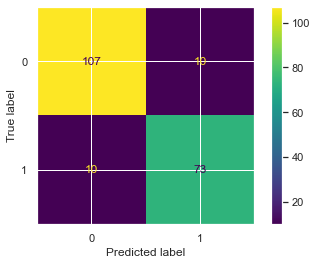

In [10]:
def question10(a):
    part4_x_train, part4_x_test, part4_y_train, part4_y_test = train_test_split(part4_x_data, part4_y_data, test_size = 0.20, random_state = a)

    # settinng: eat0=0.5 
    start = time.time()
    logreg = SGDClassifier(loss="log", learning_rate='invscaling', eta0=0.5)
    logreg.fit(part4_x_train, part4_y_train)
    stop = time.time()
    y_pred = logreg.predict(part4_x_test)
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(len(y_pred)):
        if part4_y_test.values[i] == y_pred[i] == 1:
            TP += 1
        if part4_y_test.values[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==1 and part4_y_test.values[i] == 0:
            FP += 1
        if y_pred[i]==0 and part4_y_test.values[i] == 1:
            FN += 1
            
    print("\n")
    print("The TP: " + str(TP))
    print("The TN: " + str(TN))
    print("The FP: " + str(FP))
    print("The FN: " + str(FN))
    
    print("\nThe Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(part4_y_test, y_pred)
question10(6789)

Because those numbers can show the accuracy for the model, knowing that the model whether classified correctly. If not, it can also show which part the model could be improve, like too much FP, then perhaps impose a more strict classification criteria. So those numbers can help us to evaluate the model.

Q11

In [11]:
from sklearn.neural_network import MLPClassifier
import time

part4_x_data = x_train
part4_x_data = part4_x_data[part4_x_data.columns[selector_lasso.get_support()]]
part4_y_data = train_data_label_var # label

part4_training_time_1 = []
part4_training_time_2 = []
part4_training_time_4 = []
part4_training_time_8 = []
part4_training_time_16 = []
part4_training_time_32 = []
part4_training_time_64 = []
part4_training_time_128 = []

part4_accuracy_1 = []
part4_accuracy_2 = []
part4_accuracy_4 = []
part4_accuracy_8 = []
part4_accuracy_16 = []
part4_accuracy_32 = []
part4_accuracy_64 = []
part4_accuracy_128 = []

part4_f1_score_1 = []
part4_f1_score_2 = []
part4_f1_score_4 = []
part4_f1_score_8 = []
part4_f1_score_16 = []
part4_f1_score_32 = []
part4_f1_score_64 = []
part4_f1_score_128 = []

def question11(a):
    global part4_training_time_1
    global part4_training_time_2
    global part4_training_time_4
    global part4_training_time_8
    global part4_training_time_16
    global part4_training_time_32 
    global part4_training_time_64 
    global part4_training_time_128 

    global part4_accuracy_1 
    global part4_accuracy_2 
    global part4_accuracy_4 
    global part4_accuracy_8 
    global part4_accuracy_16 
    global part4_accuracy_32 
    global part4_accuracy_64 
    global part4_accuracy_128 

    global part4_f1_score_1 
    global part4_f1_score_2 
    global part4_f1_score_4 
    global part4_f1_score_8 
    global part4_f1_score_16 
    global part4_f1_score_32 
    global part4_f1_score_64 
    global part4_f1_score_128 
    
    part4_x_train, part4_x_test, part4_y_train, part4_y_test = train_test_split(part4_x_data, part4_y_data, test_size = 0.20, random_state = a)

    # for H = 1
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (1,1,1), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_1.append(stop-start)
    y_pred_1 = mlp.predict(part4_x_test.values)
    part4_accuracy_1.append(accuracy_score(part4_y_test, y_pred_1))
    part4_f1_score_1.append(f1_score(part4_y_test, y_pred_1))

    # for H = 2
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (2,2,2), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_2.append(stop-start)
    y_pred_2 = mlp.predict(part4_x_test.values)
    part4_accuracy_2.append(accuracy_score(part4_y_test, y_pred_2))
    part4_f1_score_2.append(f1_score(part4_y_test, y_pred_2))


    # for H = 4
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (4,4,4), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_4.append(stop-start)
    y_pred_4 = mlp.predict(part4_x_test.values)
    part4_accuracy_4.append(accuracy_score(part4_y_test, y_pred_4))
    part4_f1_score_4.append(f1_score(part4_y_test, y_pred_4))

    # for H = 8
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (8,8,8), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_8.append(stop-start)
    y_pred_8 = mlp.predict(part4_x_test.values)
    part4_accuracy_8.append(accuracy_score(part4_y_test, y_pred_8))
    part4_f1_score_8.append(f1_score(part4_y_test, y_pred_8))

    # for H = 16
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (16,16,16), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_16.append(stop-start)
    y_pred_16 = mlp.predict(part4_x_test.values)
    part4_accuracy_16.append(accuracy_score(part4_y_test, y_pred_16))
    part4_f1_score_16.append(f1_score(part4_y_test, y_pred_16))

    # for H = 32
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (32,32,32), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_32.append(stop-start)
    y_pred_32 = mlp.predict(part4_x_test.values)
    part4_accuracy_32.append(accuracy_score(part4_y_test, y_pred_32))
    part4_f1_score_32.append(f1_score(part4_y_test, y_pred_32))

    # for H = 64
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (64,64,64), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_64.append(stop-start)
    y_pred_64 = mlp.predict(part4_x_test.values)
    part4_accuracy_64.append(accuracy_score(part4_y_test, y_pred_64))
    part4_f1_score_64.append(f1_score(part4_y_test, y_pred_64))


    # for H = 128
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (128,128,128), max_iter=500, early_stopping=True)
    mlp.fit(part4_x_train.values, part4_y_train)
    stop = time.time()
    part4_training_time_128.append(stop-start)
    y_pred_128 = mlp.predict(part4_x_test.values)
    part4_accuracy_128.append(accuracy_score(part4_y_test, y_pred_128))
    part4_f1_score_128.append(f1_score(part4_y_test, y_pred_128))



question11(4211)
question11(2022)
question11(6789)

# the average training time for different H
print("The average training time for H =")
print("1: " + str(statistics.mean(part4_training_time_1)))
print("2: " + str(statistics.mean(part4_training_time_2)))
print("4: " + str(statistics.mean(part4_training_time_4)))
print("8: " + str(statistics.mean(part4_training_time_8)))
print("16: " + str(statistics.mean(part4_training_time_16)))
print("32: " + str(statistics.mean(part4_training_time_32)))
print("64: " + str(statistics.mean(part4_training_time_64)))
print("128: " + str(statistics.mean(part4_training_time_128)))
print("\n")

# the standard deviation for different H
print("The standard deviation of training time for H =")
print("1: " + str(statistics.stdev(part4_training_time_1)))
print("2: " + str(statistics.stdev(part4_training_time_2)))
print("4: " + str(statistics.stdev(part4_training_time_4)))
print("8: " + str(statistics.stdev(part4_training_time_8)))
print("16: " + str(statistics.stdev(part4_training_time_16)))
print("32: " + str(statistics.stdev(part4_training_time_32)))
print("64: " + str(statistics.stdev(part4_training_time_64)))
print("128: " + str(statistics.stdev(part4_training_time_128)))
print("\n")

# the average accuracy for different H
print("The average accuracy for H =")
print("1: " + str(statistics.mean(part4_accuracy_1)))
print("2: " + str(statistics.mean(part4_accuracy_2)))
print("4: " + str(statistics.mean(part4_accuracy_4)))
print("8: " + str(statistics.mean(part4_accuracy_8)))
print("16: " + str(statistics.mean(part4_accuracy_16)))
print("32: " + str(statistics.mean(part4_accuracy_32)))
print("64: " + str(statistics.mean(part4_accuracy_64)))
print("128: " + str(statistics.mean(part4_accuracy_128)))
print("\n")

# the average F1 score for different H
print("The average F1 score for H =")
print("1: " + str(statistics.mean(part4_f1_score_1)))
print("2: " + str(statistics.mean(part4_f1_score_2)))
print("4: " + str(statistics.mean(part4_f1_score_4)))
print("8: " + str(statistics.mean(part4_f1_score_8)))
print("16: " + str(statistics.mean(part4_f1_score_16)))
print("32: " + str(statistics.mean(part4_f1_score_32)))
print("64: " + str(statistics.mean(part4_f1_score_64)))
print("128: " + str(statistics.mean(part4_f1_score_128)))
print("\n")

The average training time for H =
1: 0.027050256729125977
2: 0.028480052947998047
4: 0.07267435391743977
8: 0.059486707051595054
16: 0.07997862497965495
32: 0.09303879737854004
64: 0.14247234662373862
128: 0.1703303654988607


The standard deviation of training time for H =
1: 0.0005641619899553626
2: 0.0001029590144333924
4: 0.037833053757278516
8: 0.035082907365371126
16: 0.00692530546797791
32: 0.04113310290076071
64: 0.014732569675192483
128: 0.01885122855969684


The average accuracy for H =
1: 0.47
2: 0.47333333333333333
4: 0.77
8: 0.7066666666666667
16: 0.8916666666666667
32: 0.8733333333333333
64: 0.9166666666666667
128: 0.9033333333333333


The average F1 score for H =
1: 0.38600033653037186
2: 0.39582504586033246
4: 0.5551350855465346
8: 0.7315355755860748
16: 0.8666902944621808
32: 0.8316942719116632
64: 0.8963762498164783
128: 0.8815762567738624




Similar model setting with perivous. MLPClassifier() is being used for modeling, with 3 hidden layers, 500 max_iter and allow early stopping. Also function for taking 3 seeds then provide the average figures. With more hidden units, more average training time and both average accuracy and F1 score will be improved.

Q12

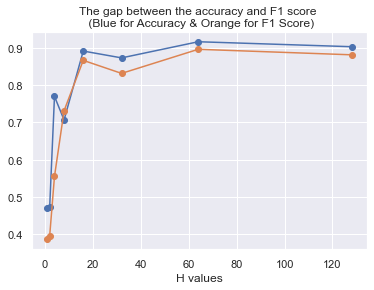

In [12]:
# the graph
x = (1,2,4,8,16,32,64,128) 
y = (statistics.mean(part4_accuracy_1),statistics.mean(part4_accuracy_2),statistics.mean(part4_accuracy_4),statistics.mean(part4_accuracy_8),statistics.mean(part4_accuracy_16),statistics.mean(part4_accuracy_32),statistics.mean(part4_accuracy_64),statistics.mean(part4_accuracy_128))
z = (statistics.mean(part4_f1_score_1),statistics.mean(part4_f1_score_2),statistics.mean(part4_f1_score_4),statistics.mean(part4_f1_score_8),statistics.mean(part4_f1_score_16),statistics.mean(part4_f1_score_32),statistics.mean(part4_f1_score_64),statistics.mean(part4_f1_score_128))

fig,ax=plt.subplots()
ax.set_title("The gap between the accuracy and F1 score \n (Blue for Accuracy & Orange for F1 Score)")
ax.plot(x, y, marker="o")
ax.set_xlabel("H values")
ax.plot(x, z, marker="o")
plt.show()

Perhaps small H suffer from outliers again. As we can see in the graph, the gap between accuracy and f1 score keep narrowing when increasing the H. After H = 16, the gap seems to be maintained constantly. And the classes may very imbalanced thus leading to accuracy is a lot higher than F1 score with small H.

Q13

In [13]:
# comparison
print("Comparison of the logistic regression model and the best neural network model(H=128) :\n")

print("The average training time for the logistic regression model: " + str(statistics.mean(part4_training_time)))
print("The average training time for the best neural network model: " + str(statistics.mean(part4_training_time_128)))
print("\n")

print("The average accuracy for the logistic regression model: " + str(statistics.mean(part4_accuracy)))
print("The average accuracy for the best neural network model: " + str(statistics.mean(part4_accuracy_128)))
print("\n")

print("The average F1 score for the logistic regression model: " + str(statistics.mean(part4_f1_score)))
print("The average F1 score for the best neural network model: " + str(statistics.mean(part4_f1_score_128)))

Comparison of the logistic regression model and the best neural network model(H=128) :

The average training time for the logistic regression model: 0.006056626637776692
The average training time for the best neural network model: 0.1703303654988607


The average accuracy for the logistic regression model: 0.9183333333333333
The average accuracy for the best neural network model: 0.9033333333333333


The average F1 score for the logistic regression model: 0.9007855357548609
The average F1 score for the best neural network model: 0.8815762567738624


logistic regression model performs a lot faster trainging time than the best neural network model(H=128). Although both accuracy and F1 score of the best neural network model higher than the logistic regression model, the difference is extremely small.

Q14

The accuracy and F1 score increase sharply for H<16, it may due to the effect of the outliners could elminated with 16 hidden units or more.

## Part 5

Q15

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer , accuracy_score, ConfusionMatrixDisplay
import time

part5_x_data = x_train
part5_x_data = part4_x_data
part5_y_data = train_data_label_var # label

part5_x_train, part5_x_test, part5_y_train, part5_y_test = train_test_split(part5_x_data, part5_y_data, test_size=0.20, random_state=4211)

mlp = MLPClassifier(random_state=4211, early_stopping=True)
param_grid = {"hidden_layer_sizes":[(64,32,32),(32,64,32),(32,32,64)],
              "activation":['identity', 'logistic', 'tanh', 'relu'],
              "shuffle":[True, False]
             }
kflod = KFold(n_splits=5)

grid = GridSearchCV(mlp,param_grid,cv=kflod)
start=time.time()
grid.fit(part5_x_train.values, part5_y_train)
stop=time.time()

grid.cv_results_["params"]

[{'activation': 'identity',
  'hidden_layer_sizes': (64, 32, 32),
  'shuffle': True},
 {'activation': 'identity',
  'hidden_layer_sizes': (64, 32, 32),
  'shuffle': False},
 {'activation': 'identity',
  'hidden_layer_sizes': (32, 64, 32),
  'shuffle': True},
 {'activation': 'identity',
  'hidden_layer_sizes': (32, 64, 32),
  'shuffle': False},
 {'activation': 'identity',
  'hidden_layer_sizes': (32, 32, 64),
  'shuffle': True},
 {'activation': 'identity',
  'hidden_layer_sizes': (32, 32, 64),
  'shuffle': False},
 {'activation': 'logistic',
  'hidden_layer_sizes': (64, 32, 32),
  'shuffle': True},
 {'activation': 'logistic',
  'hidden_layer_sizes': (64, 32, 32),
  'shuffle': False},
 {'activation': 'logistic',
  'hidden_layer_sizes': (32, 64, 32),
  'shuffle': True},
 {'activation': 'logistic',
  'hidden_layer_sizes': (32, 64, 32),
  'shuffle': False},
 {'activation': 'logistic',
  'hidden_layer_sizes': (32, 32, 64),
  'shuffle': True},
 {'activation': 'logistic',
  'hidden_layer_sizes

Since I want to know increase the hidden units in which layer is better, so I make 3 options for param_grid in GridSearchCV(), which [(64,32,32),(32,64,32),(32,32,64)]. Also whether the activation or shuffle will affect the performance. So there are 24 combinations in total.

Q16

In [15]:
print("The three best hyperparameter settings: ")
print("1: ", grid.cv_results_['params'][2])
print("-> the mean score = ", grid.cv_results_['mean_test_score'][2])
print("-> the standard deviation score = ", grid.cv_results_['mean_test_score'][2])
print("\n")

print("2: ", grid.cv_results_['params'][15])
print("-> the mean score = ", grid.cv_results_['mean_test_score'][15])
print("-> the standard deviation score = ", grid.cv_results_['mean_test_score'][15])
print("\n")

print("3: ", grid.cv_results_['params'][14])
print("-> the mean score = ", grid.cv_results_['mean_test_score'][14])
print("-> the standard deviation score = ", grid.cv_results_['mean_test_score'][14])


The three best hyperparameter settings: 
1:  {'activation': 'identity', 'hidden_layer_sizes': (32, 64, 32), 'shuffle': True}
-> the mean score =  0.92875
-> the standard deviation score =  0.92875


2:  {'activation': 'tanh', 'hidden_layer_sizes': (32, 64, 32), 'shuffle': False}
-> the mean score =  0.9262500000000001
-> the standard deviation score =  0.9262500000000001


3:  {'activation': 'tanh', 'hidden_layer_sizes': (32, 64, 32), 'shuffle': True}
-> the mean score =  0.925
-> the standard deviation score =  0.925


As we can see, increase the units in middle layer perform the best in our model. For identity activation, allowing shuffle could lead to a higher mean score, or a better model.

Q17

The best model prediction:
The accuracy score:  0.9084967320261438
The F1 score 0.8900523560209425

The Confusion Matrix:


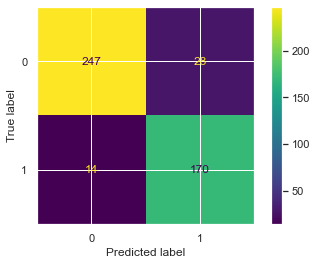

In [16]:
print("The best model prediction:")
mlp = MLPClassifier(hidden_layer_sizes = (32,64,32), activation='identity', shuffle=True, max_iter=500, random_state=4211, early_stopping=True)
mlp.fit(part5_x_train.values, part5_y_train)
part5_x_test = x_test[x_test.columns[selector_lasso.get_support()]]
part5_y_test = test_data_label_var
y_pred = mlp.predict(part5_x_test.values)
print("The accuracy score: ", accuracy_score(part5_y_test, y_pred))
print("The F1 score", f1_score(part5_y_test, y_pred))
print("\nThe Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(part5_y_test, y_pred)
plt.show()


By using our model to the test data, both accuracy score and F1 score are near 0.9.